In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


## Showcase the Relationship Between Weather Variables and Latitude

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define units parameter using metric to get the values in celsius
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and units parameter
    city_url = f"{url}?q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | coyhaique
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | fort bragg
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | maloye ganyushkino
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | grand falls-windsor
Processing Record 20 of Set 1 | arkhangel'sk
Processing Record 21 of Set 1 | kudym

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [19]:
# Display top portion of the data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,-10.67,48,40,8.00,RU,1708442249
1,stanley,54.8680,-1.6985,11.39,82,75,5.66,GB,1708442250
2,adamstown,-25.0660,-130.1015,25.72,84,100,5.39,PN,1708442251
3,coyhaique,-45.5752,-72.0662,21.34,56,75,2.57,CL,1708442252
4,ushuaia,-54.8000,-68.3000,10.79,57,40,9.26,AR,1708442252


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,-10.67,48,40,8.00,RU,1708442249
1,stanley,54.8680,-1.6985,11.39,82,75,5.66,GB,1708442250
2,adamstown,-25.0660,-130.1015,25.72,84,100,5.39,PN,1708442251
3,coyhaique,-45.5752,-72.0662,21.34,56,75,2.57,CL,1708442252
4,ushuaia,-54.8000,-68.3000,10.79,57,40,9.26,AR,1708442252


## Latitude vs Max Temperature

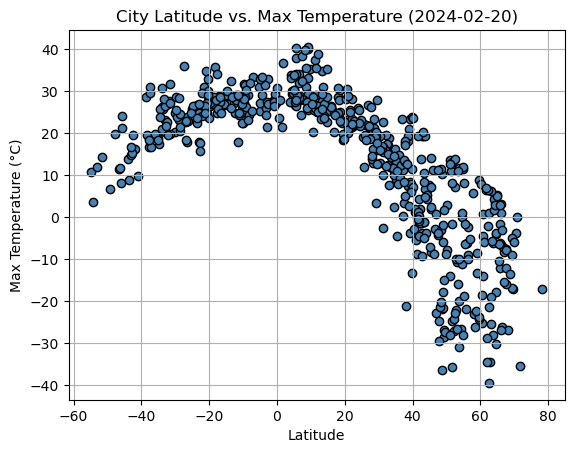

In [28]:
# Data
latitudes = city_data_df["Lat"]
max_temperatures = city_data_df["Max Temp"]

# Create scatter plot
plt.scatter(latitudes, max_temperatures, marker="o", facecolors="steelblue", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature (2024-02-20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid()

# Save the figure
plt.savefig("../Output/Fig1.png")

# Show plot
plt.show()

## Latitude vs Humidity

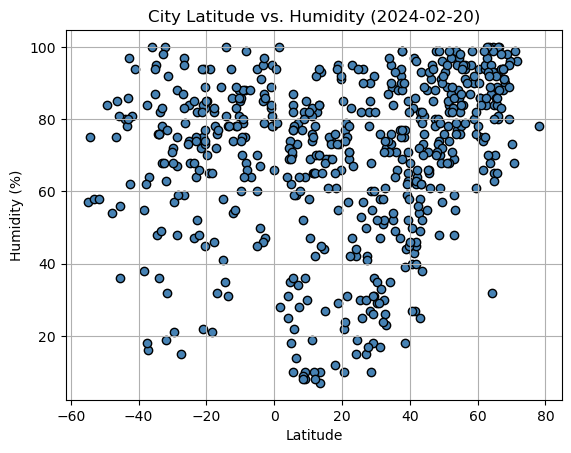

In [31]:
# Data
latitudes = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Create scatter plot
plt.scatter(latitudes, humidity, marker="o", facecolors="steelblue", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity (2024-02-20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../Output/Fig2.png")

# Show plot
plt.show()

## Latitude vs Cloudiness

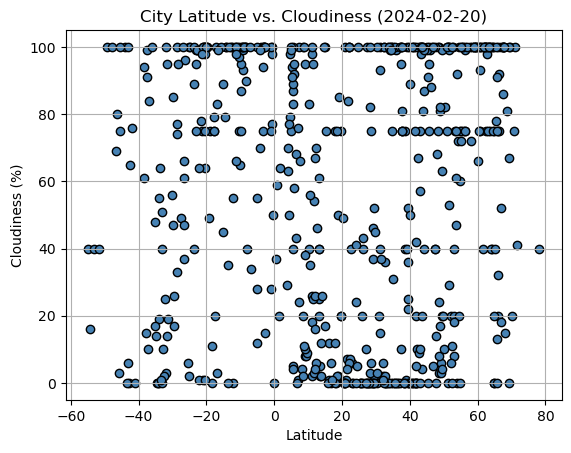

In [32]:
# Data
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Create scatter plot
plt.scatter(latitudes, cloudiness, marker="o", facecolors="steelblue", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness (2024-02-20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../Output/Fig3.png")

# Show plot
plt.show()

## Latitude vs Wind Speed

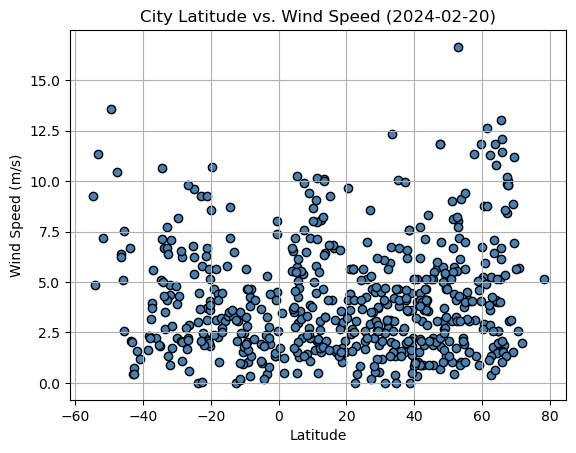

In [33]:
# Data
latitudes = city_data_df["Lat"]
windspeed = city_data_df["Wind Speed"]

# Create scatter plot
plt.scatter(latitudes, windspeed, marker="o", facecolors="steelblue", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Wind Speed (2024-02-20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../Output/Fig4.png")

# Show plot
plt.show()

In [41]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, hemisphere, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot data and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression equation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{hemisphere} Hemisphere - {xlabel} vs. {ylabel}")

    # Print the r-value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [38]:
# Create Northern Hemisphere DataFrame
northern_df = city_data_df[city_data_df["Lat"] >= 0]

northern_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,-10.67,48,40,8.00,RU,1708442249
1,stanley,54.8680,-1.6985,11.39,82,75,5.66,GB,1708442250
5,cabo san lucas,22.8909,-109.9124,22.09,47,0,3.09,MX,1708442157
6,fort bragg,35.1390,-79.0060,9.00,52,0,4.63,US,1708442253
8,isafjordur,66.0755,-23.1240,1.02,80,20,1.54,IS,1708442255


In [39]:

# Create Southern Hemisphere DataFrame
southern_df = city_data_df[city_data_df["Lat"] < 0]

southern_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,25.72,84,100,5.39,PN,1708442251
3,coyhaique,-45.5752,-72.0662,21.34,56,75,2.57,CL,1708442252
4,ushuaia,-54.8000,-68.3000,10.79,57,40,9.26,AR,1708442252
7,waitangi,-43.9535,-176.5597,13.79,80,100,6.71,NZ,1708442254
9,broken hill,-31.9500,141.4333,27.64,19,100,4.36,AU,1708442255


The r-value is: 0.6870976130654641


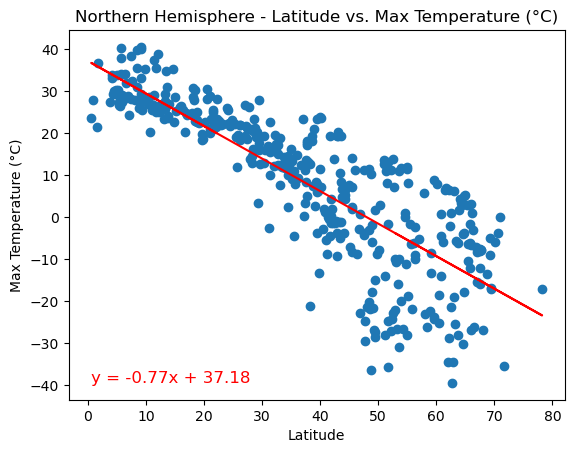

The r-value is: 0.42861859904636146


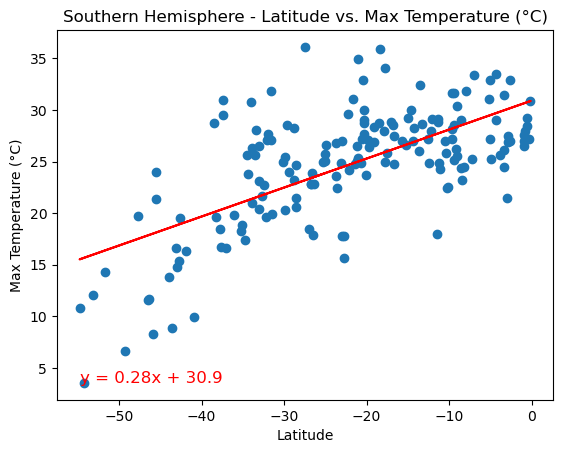

In [42]:

# Plot Latitude vs. Temperature
plot_linear_regression(northern_df["Lat"], northern_df["Max Temp"], "Northern", "Latitude", "Max Temperature (°C)")
plot_linear_regression(southern_df["Lat"], southern_df["Max Temp"], "Southern", "Latitude", "Max Temperature (°C)")


# There is a strong positive correlation between latitude and maximum temperature in the Northern Hemisphere. This means that as you move away from the equator (increasing latitude), temperatures tend to decrease.

# There is also a tendency for temperatures to increase as you move closer to the equator (decreasing latitude). However, the correlation is not as strong as in the Northern Hemisphere.

The r-value is: 0.20118137852091228


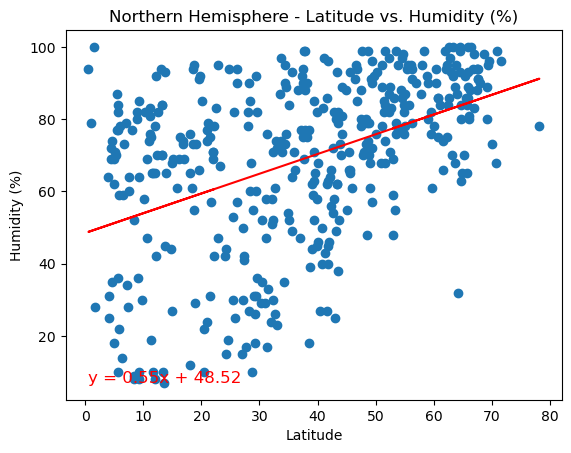

The r-value is: 0.0233767180235843


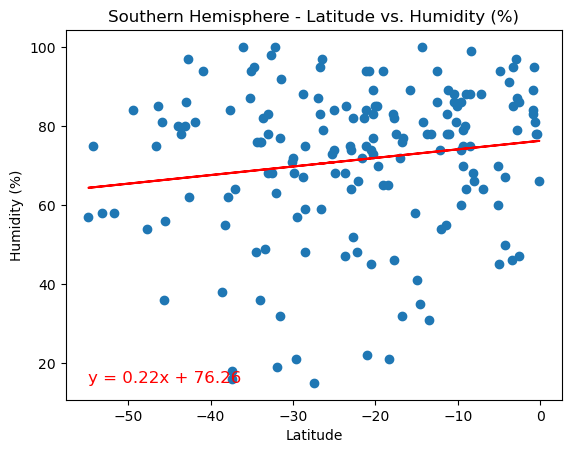

In [43]:

# Plot Latitude vs. Humidity
plot_linear_regression(northern_df["Lat"], northern_df["Humidity"], "Northern", "Latitude", "Humidity (%)")
plot_linear_regression(southern_df["Lat"], southern_df["Humidity"], "Southern", "Latitude", "Humidity (%)")


# The correlation between the latitude and Humidity in the northern hemisphere suggests a weak correlation. There is a slight tendency for humidity to increase as you move away from the equator (increasing latitude), but the relationship is not very strong.

# The correlation coefficient in the southern hemisphere between latitude and humidity suggests an extremely weak positive correlation. There is almost no relationship between latitude and humidity levels in the Southern Hemisphere.

The r-value is: 0.07241672198512139


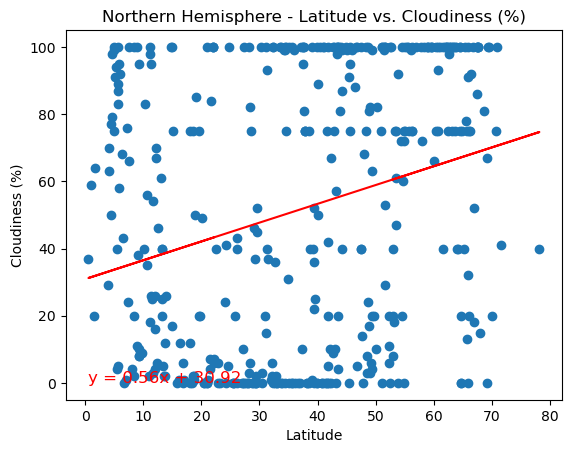

The r-value is: 0.09287519955675282


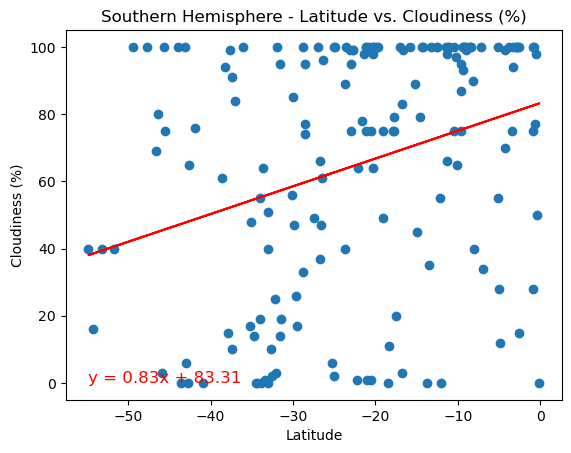

In [44]:
# Plot Latitude vs. Cloudiness
plot_linear_regression(northern_df["Lat"], northern_df["Cloudiness"], "Northern", "Latitude", "Cloudiness (%)")
plot_linear_regression(southern_df["Lat"], southern_df["Cloudiness"], "Southern", "Latitude", "Cloudiness (%)")

# In both the northern and southern hemisphere, there is a very weak positive correlation between cloudiness and latitude. Thi suggests that latitude is not a strong predictor of cloudiness in either locations. Other factors may need to be considered.

The r-value is: 0.015049118610820589


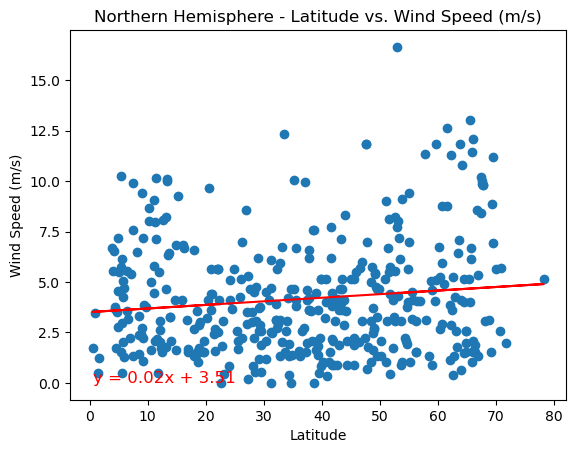

The r-value is: 0.09332213956590239


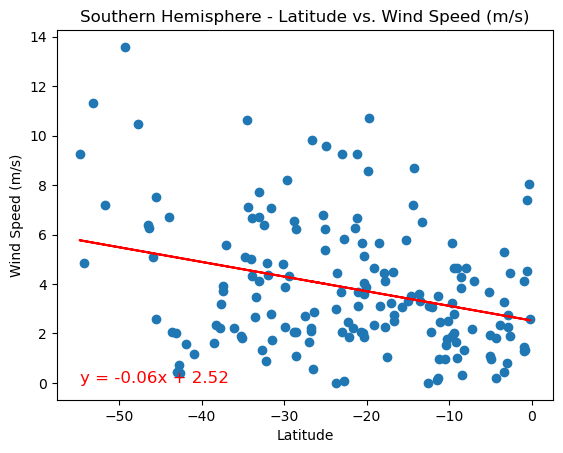

In [45]:
# Plot Latitude vs. Wind Speed
plot_linear_regression(northern_df["Lat"], northern_df["Wind Speed"], "Northern", "Latitude", "Wind Speed (m/s)")
plot_linear_regression(southern_df["Lat"], southern_df["Wind Speed"], "Southern", "Latitude", "Wind Speed (m/s)")

# Both the Northern and Southern Hemispheres show a low correlation between latitude and wind speed, indicated by low r-values, it suggests that latitude may not be a significant factor in determining wind speed.